# Chinese Calligraphy

Text rendering with [Flat](https://xxyxyz.org/flat) and [Bezmerizing](https://github.com/aparrish/bezmerizing/).

## Getting path data for a character

Using a JSON file from [Chinese hershey font](https://github.com/LingDong-/chinese-hershey-font) -- this file consists of traditional Chinese characters based on 思源黑體 (Souce Han Sans), including all Unicode basic CJK Ideographs.

In [1]:
import json

In [2]:
all_data = json.load(open("./STRK-Heiti.json"))

To get the character with unicode "U+4E0E" (与) in the data

In [3]:
print(all_data['U+4E0E'])

[[[0.23, 0.19], [0.99, 0.19]], [[0.16, 0.47], [1.0, 0.47]], [[0.02, 0.69], [0.77, 0.69]], [[0.57, 0.95], [0.88, 0.95]], [[0.97, 0.64], [0.86, 0.97]], [[0.28, 0.12], [0.15, 0.51]]]


Unlike english characters in the chars74k library, where the strokes are curved lines, in these fonts each stroke is one straight line consisting of two parameters only. In this character, there are 6 strokes which can be accessed by `(all_data["U+4E0E"])[0]` to `(all_data["U+4E0E"])[5]`

In [4]:
(all_data["U+4E0E"])[5]

[[0.28, 0.12], [0.15, 0.51]]

The JSON file consists of a dictionary whose keys are individual characters in the font

In [5]:
heiti = all_data.keys

In [6]:
from flat import document, shape, rgba
from bezmerizing import Polyline

import numpy as np
from numpy.random import uniform, normal

In [7]:
from IPython.display import SVG, display
def show(page):
    display(SVG(page.svg()))

## draw one character

Cleaning up the json and identifying the strokes that makes up each character. First it's important to get rid of the `keys` ("Unicode":) without flatening the list. This is a method I googled; I'm actually unsure what I did here.

In [8]:
import random
from random import choice, sample, randint

In [9]:
## getting rid of the keys, character only

chars = all_data.items()

for key, character in chars:
    print(character)

[[[0.0, 0.89], [0.89, 0.89], [1.02, 0.97]], [[0.06, 0.89], [0.255, 0.93], [0.405, 0.93], [0.555, 0.93], [0.705, 0.93], [0.9, 0.97]], [[0.93, 0.89], [0.735, 0.93], [0.585, 0.93], [0.435, 0.93], [0.285, 0.93], [0.15, 0.93], [-0.03, 0.97]]]
[[[0.52, 0.14], [0.52, 0.98]], [[0.0, 0.14], [1.0, 0.14]], [[0.24, 0.96], [0.54, 0.96]]]
[[[0.01, 0.11], [1.0, 0.11]], [[0.21, 0.49], [0.87, 0.49]], [[0.47, 0.97], [0.74, 0.97]], [[0.84, 0.64], [0.72, 1.0]], [[0.34, 0.12], [0.2, 0.54]]]
[[[0.36, 0.05], [0.36, 0.96]], [[0.7, 0.37], [0.96, 0.37]], [[0.15, 0.46], [0.42, 0.46]], [[0.38, 0.97], [0.91, 0.97]], [[0.94, 0.8], [0.87, 1.01]], [[0.24, 0.45], [0.03, 0.52]], [[0.72, 0.37], [0.54, 0.42], [0.33, 0.48]]]
[[[0.47, 0.06], [0.47, 1.0]], [[0.0, 0.96], [1.0, 0.96]]]
[[[0.48, 0.13], [0.48, 0.99]], [[0.0, 0.13], [1.0, 0.13]]]
[[[0.0, 0.14], [1.0, 0.14]], [[0.54, 0.15], [0.415, 0.56], [0.29, 0.805], [0.09, 0.98]]]
[[[0.03, 0.11], [1.0, 0.11]], [[0.53, 0.96], [0.8, 0.96]], [[0.37, 0.39], [0.245, 0.795], [0.03,

[[[0.02, 0.15], [0.02, 0.83]], [[0.02, 0.15], [0.25, 0.15], [0.24, 0.71]], [[0.68, 0.64], [0.68, 0.98]], [[0.38, 0.08], [0.93, 0.08], [0.91, 0.29]], [[0.38, 0.25], [0.95, 0.25]], [[0.38, 0.38], [0.99, 0.38]], [[0.47, 0.6], [0.86, 0.6]], [[0.02, 0.67], [0.26, 0.67]], [[0.46, 0.76], [0.95, 0.76]], [[0.38, 0.94], [0.99, 0.94]], [[0.79, 0.48], [0.94, 0.63]], [[0.7, 0.38], [0.45, 0.63]], [[0.38, 0.08], [0.38, 0.68], [0.27, 0.99]]]
[[[0.0, 0.14], [0.0, 0.81]], [[0.0, 0.14], [0.26, 0.14], [0.25, 0.7]], [[0.38, 0.3], [0.38, 0.99]], [[0.68, 0.09], [0.57, 0.33], [0.55, 0.94]], [[0.74, 0.3], [0.74, 0.94]], [[0.38, 0.3], [0.94, 0.3], [0.92, 0.99]], [[0.34, 0.08], [1.0, 0.08]], [[0.55, 0.53], [0.76, 0.53]], [[0.0, 0.67], [0.27, 0.67]], [[0.55, 0.7], [0.76, 0.7]], [[0.38, 0.9], [0.96, 0.9]]]
[[[0.02, 0.18], [0.02, 0.86]], [[0.02, 0.18], [0.205, 0.18], [0.19, 0.78]], [[0.42, 0.05], [0.42, 1.0]], [[0.62, 0.58], [0.62, 0.99]], [[0.77, 0.04], [0.77, 0.62]], [[0.62, 0.58], [0.96, 0.58], [0.94, 0.99]], [[

[[[0.14, 0.09], [0.14, 0.29]], [[0.44, 0.59], [0.44, 1.0]], [[0.47, 0.16], [0.53, 0.28]], [[0.4, 0.1], [0.54, 0.095], [0.665, 0.08], [0.65, 0.55]], [[0.65, 0.59], [0.65, 0.96]], [[0.44, 0.59], [0.885, 0.59], [0.87, 0.99]], [[0.36, 0.31], [0.98, 0.31]], [[0.44, 0.75], [0.9, 0.75]], [[0.44, 0.92], [0.9, 0.92]], [[0.13, 0.33], [0.04, 0.61], [0.34, 0.88]], [[0.65, 0.29], [0.91, 0.55]], [[0.02, 0.25], [0.305, 0.25], [0.29, 0.46], [0.17, 0.83], [0.01, 0.97]], [[0.67, 0.29], [0.575, 0.39], [0.41, 0.56]], [[0.84, 0.15], [0.77, 0.36]], [[0.85, 0.03], [0.64, 0.1]]]
[[[0.4, 0.42], [0.605, 0.42], [0.59, 0.67]], [[0.7, 0.42], [0.915, 0.42], [0.9, 0.67]], [[0.0, 0.26], [0.32, 0.26]], [[0.5, 0.27], [0.83, 0.27]], [[0.4, 0.42], [0.4, 0.655], [0.62, 0.64]], [[0.7, 0.42], [0.7, 0.655], [0.93, 0.64]], [[0.78, 0.78], [0.93, 0.93]], [[0.52, 0.81], [0.62, 0.91]], [[0.08, 0.61], [0.31, 0.84]], [[0.65, 0.05], [0.8, 0.205], [1.0, 0.3]], [[0.81, 0.72], [0.69, 0.96]], [[0.28, 0.31], [0.29, 0.47], [0.205, 0.735],

[[[0.23, 0.04], [0.23, 0.53]], [[0.75, 0.04], [0.75, 0.53]], [[0.12, 0.58], [0.87, 0.58], [0.85, 0.99]], [[0.03, 0.12], [0.44, 0.12]], [[0.54, 0.12], [0.98, 0.12]], [[0.06, 0.26], [0.41, 0.26]], [[0.56, 0.26], [0.96, 0.26]], [[0.02, 0.41], [0.45, 0.41]], [[0.53, 0.41], [1.0, 0.41]], [[0.14, 0.75], [0.89, 0.75]], [[0.11, 0.93], [0.89, 0.93]]]
[[[0.1, 0.48], [0.1, 0.97]], [[0.2, 0.25], [0.75, 0.25]], [[0.0, 0.37], [0.99, 0.37]], [[0.38, 0.54], [0.64, 0.54]], [[0.1, 0.63], [0.28, 0.63]], [[0.33, 0.71], [0.67, 0.71]], [[0.74, 0.47], [0.735, 0.955], [0.98, 0.94]], [[0.49, 0.53], [0.5, 0.815], [0.65, 0.94]], [[0.47, 0.84], [0.33, 0.98]], [[0.27, 0.06], [0.19, 0.3]], [[0.43, 0.46], [0.33, 0.66]], [[0.27, 0.89], [0.03, 0.97]], [[0.89, 0.62], [0.71, 0.71]], [[0.24, 0.12], [0.775, 0.12], [0.66, 0.42]]]
[[[0.05, 0.38], [0.05, 0.52]], [[0.49, 0.48], [0.49, 0.99]], [[0.18, 0.48], [0.81, 0.48], [0.8, 0.71]], [[0.22, 0.19], [0.77, 0.19]], [[0.02, 0.28], [0.99, 0.28]], [[0.18, 0.58], [0.82, 0.58]], [[

[[[0.18, 0.04], [0.18, 0.98]], [[0.45, 0.07], [0.895, 0.07], [0.88, 0.38]], [[0.45, 0.22], [0.91, 0.22]], [[0.02, 0.26], [0.33, 0.26]], [[0.45, 0.07], [0.45, 0.37], [0.91, 0.36]], [[0.38, 0.49], [0.99, 0.49]], [[0.05, 0.96], [0.2, 0.96]], [[0.73, 0.97], [0.89, 0.97]], [[0.52, 0.57], [0.33, 0.76]], [[0.61, 0.64], [0.55, 0.77], [0.36, 0.95]], [[0.79, 0.64], [0.64, 0.94]], [[0.43, 0.65], [0.93, 0.64], [0.92, 0.835], [0.86, 0.99]], [[0.3, 0.53], [-0.03, 0.64]]]
[[[0.15, 0.03], [0.15, 0.98]], [[0.55, 0.04], [0.425, 0.275], [0.44, 0.73]], [[0.38, 0.3], [0.9, 0.29], [0.89, 0.73]], [[0.02, 0.25], [0.29, 0.25]], [[0.32, 0.7], [0.99, 0.7]], [[0.04, 0.96], [0.17, 0.96]], [[0.72, 0.38], [0.82, 0.58]], [[0.64, 0.66], [0.715, 0.825], [0.795, 0.9], [0.98, 0.98]], [[0.6, 0.38], [0.5, 0.58]], [[0.5, 0.13], [0.76, 0.115], [0.64, 0.32]], [[0.66, 0.6], [0.595, 0.825], [0.505, 0.905], [0.31, 0.99]], [[0.27, 0.53], [-0.03, 0.63]]]
[[[0.15, 0.04], [0.15, 0.98]], [[0.77, 0.63], [0.77, 0.99]], [[0.43, 0.38], [

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




[[[0.22, 0.3], [0.22, 0.9]], [[0.54, 0.58], [0.54, 0.89]], [[0.54, 0.58], [0.76, 0.58], [0.75, 0.82]], [[0.89, 0.47], [0.89, 0.99]], [[0.49, 0.14], [0.98, 0.14]], [[0.09, 0.3], [0.36, 0.3]], [[0.46, 0.47], [1.0, 0.47]], [[0.03, 0.5], [0.4, 0.5]], [[0.54, 0.79], [0.77, 0.79]], [[0.75, 0.97], [0.92, 0.97]], [[0.21, 0.07], [0.4, 0.26]], [[0.23, 0.09], [0.01, 0.31]], [[0.69, 0.23], [0.93, 0.35]], [[0.76, 0.06], [0.67, 0.32], [0.49, 0.4]], [[0.06, 0.62], [0.12, 0.8]], [[0.36, 0.63], [0.3, 0.81]], [[0.33, 0.85], [0.03, 0.95]]]
[[[0.07, 0.65], [0.12, 0.8]], [[0.97, 0.37], [0.91, 0.49]], [[0.76, 0.04], [0.9, 0.11]], [[0.52, 0.19], [0.73, 0.185], [0.97, 0.18]], [[0.09, 0.3], [0.36, 0.3]], [[0.03, 0.49], [0.39, 0.49]], [[0.46, 0.67], [0.705, 0.66], [0.94, 0.65]], [[0.21, 0.06], [0.4, 0.25]], [[0.75, 0.51], [0.9, 0.56]], [[0.61, 0.03], [0.705, 0.34], [0.86, 0.47]], [[0.22, 0.08], [0.01, 0.29]], [[0.98, 0.85], [0.93, 1.0]], [[0.81, 0.31], [0.53, 0.45]], [[0.86, 0.72], [0.735, 0.855], [0.45, 0.99]

[[[0.07, 0.55], [0.07, 0.99]], [[0.07, 0.55], [0.43, 0.55], [0.41, 0.94]], [[0.03, 0.17], [0.48, 0.17]], [[0.0, 0.41], [0.49, 0.41]], [[0.07, 0.72], [0.45, 0.72]], [[0.07, 0.9], [0.45, 0.9]], [[0.69, 0.96], [0.92, 0.96]], [[0.64, 0.4], [0.79, 0.55]], [[0.22, 0.04], [0.3, 0.2]], [[0.4, 0.24], [0.3, 0.44]], [[0.69, 0.04], [0.52, 0.38]], [[0.89, 0.61], [0.53, 0.79]], [[0.11, 0.24], [0.16, 0.39]], [[0.6, 0.22], [0.985, 0.215], [0.965, 0.575], [0.965, 0.795], [0.88, 1.0]]]
[[[0.07, 0.55], [0.07, 0.99]], [[0.07, 0.55], [0.395, 0.55], [0.38, 0.94]], [[0.55, 0.58], [0.55, 0.99]], [[0.55, 0.58], [0.955, 0.58], [0.94, 0.99]], [[0.52, 0.09], [0.985, 0.09], [0.97, 0.44]], [[0.03, 0.14], [0.45, 0.14]], [[0.0, 0.41], [0.46, 0.41]], [[0.77, 0.45], [0.97, 0.45]], [[0.07, 0.72], [0.41, 0.72]], [[0.07, 0.9], [0.41, 0.9]], [[0.55, 0.91], [0.97, 0.91]], [[0.21, 0.03], [0.26, 0.18]], [[0.1, 0.24], [0.15, 0.39]], [[0.37, 0.22], [0.26, 0.44]], [[0.73, 0.16], [0.57, 0.48]]]
[[[0.07, 0.55], [0.07, 0.99]], [[0.

[[[0.15, 0.7], [0.15, 0.83]], [[0.25, 0.07], [0.25, 0.59]], [[0.23, 0.69], [0.28, 0.84]], [[0.56, 0.4], [0.56, 0.82]], [[0.56, 0.4], [0.795, 0.4], [0.78, 0.73]], [[0.07, 0.07], [0.45, 0.07]], [[0.07, 0.23], [0.42, 0.23]], [[0.07, 0.39], [0.42, 0.39]], [[0.56, 0.7], [0.81, 0.7]], [[0.73, 0.96], [0.93, 0.96]], [[0.25, 0.97], [0.4, 0.97]], [[0.31, 0.66], [0.37, 0.78]], [[0.63, 0.06], [0.46, 0.4]], [[0.55, 0.21], [0.985, 0.205], [0.97, 0.805], [0.89, 1.0]], [[0.06, 0.69], [0.06, 0.8], [0.01, 0.93]], [[0.07, 0.07], [0.07, 0.575], [0.435, 0.56], [0.425, 0.84], [0.37, 0.99]]]
[[[0.06, 0.7], [0.06, 0.815], [0.02, 0.93]], [[0.15, 0.7], [0.15, 0.83]], [[0.26, 0.07], [0.26, 0.6]], [[0.07, 0.07], [0.07, 0.585], [0.435, 0.57], [0.42, 0.93]], [[0.74, 0.23], [0.74, 0.88]], [[0.07, 0.07], [0.45, 0.07]], [[0.49, 0.09], [0.99, 0.09]], [[0.07, 0.23], [0.43, 0.23]], [[0.07, 0.39], [0.43, 0.39]], [[0.47, 0.92], [1.0, 0.92]], [[0.26, 0.97], [0.41, 0.97]], [[0.31, 0.67], [0.37, 0.79]], [[0.81, 0.1], [0.63, 0

[[[0.34, 0.14], [0.23, 0.32], [0.22, 0.75]], [[0.19, 0.04], [0.03, 0.33], [0.37, 0.31], [0.36, 0.75]], [[0.7, 0.48], [0.7, 0.99]], [[0.14, 0.13], [0.36, 0.13]], [[0.58, 0.15], [0.91, 0.15]], [[0.06, 0.51], [0.38, 0.51]], [[0.46, 0.62], [0.98, 0.62]], [[0.07, 0.24], [0.065, 0.73], [0.38, 0.71]], [[0.08, 0.89], [0.24, 0.89]], [[0.57, 0.96], [0.74, 0.96]], [[0.85, 0.75], [0.97, 0.87]], [[0.63, 0.11], [0.44, 0.3]], [[0.56, 0.19], [0.75, 0.395], [0.98, 0.5]], [[0.56, 0.72], [0.46, 0.92]], [[0.88, 0.18], [0.69, 0.38], [0.43, 0.5]], [[0.15, 0.88], [0.0, 0.93]], [[0.36, 0.84], [0.18, 0.9]]]
[[[0.36, 0.14], [0.245, 0.32], [0.23, 0.74]], [[0.19, 0.04], [0.03, 0.33], [0.4, 0.31], [0.39, 0.74]], [[0.74, 0.55], [0.74, 0.98]], [[0.14, 0.13], [0.39, 0.13]], [[0.52, 0.36], [0.78, 0.36]], [[0.07, 0.51], [0.41, 0.51]], [[0.54, 0.56], [0.755, 0.555], [0.97, 0.55]], [[0.07, 0.25], [0.07, 0.725], [0.41, 0.71]], [[0.02, 0.89], [0.195, 0.885], [0.28, 0.875], [0.43, 0.87]], [[0.62, 0.97], [0.75, 0.97]], [[0.8

This `character` variable somehow only displays the last character in the dataset (which is `U+9FEF`). Listing all the characters needs another way of parsing. For now I'm moving on with this character. I'll make a more accurate list with all the characters later on in this notebook.

In [10]:
char2_electric_boogaloo = character
list(char2_electric_boogaloo)

[[[0.22, 0.03], [0.22, 0.53]],
 [[0.48, 0.57], [0.48, 1.0]],
 [[0.5, 0.13], [0.95, 0.13]],
 [[0.07, 0.15], [0.39, 0.15]],
 [[0.09, 0.74], [0.92, 0.74]],
 [[0.28, 0.62], [0.37, 0.71]],
 [[0.74, 0.61], [0.63, 0.72]],
 [[0.48, 0.4], [0.59, 0.465], [0.98, 0.67]],
 [[0.48, 0.7], [0.6, 0.825], [0.9, 0.97]],
 [[0.1, 0.06], [0.02, 0.3]],
 [[0.56, 0.04], [0.45, 0.26]],
 [[0.66, 0.12], [0.55, 0.34]],
 [[0.82, 0.12], [0.67, 0.42]],
 [[0.41, 0.48], [0.01, 0.68]],
 [[0.51, 0.7], [0.385, 0.83], [0.09, 0.97]],
 [[0.39, 0.31], [0.21, 0.355], [0.0, 0.41]],
 [[0.92, 0.17], [0.925, 0.355], [0.88, 0.48], [0.75, 0.51]]]

In [11]:
## checking all the variables cause I'm already confused
%whos

Variable                  Type                          Data/Info
-----------------------------------------------------------------
Polyline                  type                          <class 'bezmerizing.Polyline'>
SVG                       type                          <class 'IPython.core.display.SVG'>
all_data                  dict                          n=20976
char2_electric_boogaloo   list                          n=17
character                 list                          n=17
chars                     dict_items                    dict_items([('U+4E00', [[<...> 0.48], [0.75, 0.51]]])])
choice                    method                        <bound method Random.choi<...>bject at 0x7f9b9f82d210>>
display                   function                      <function display at 0x7f9ba1485e50>
document                  type                          <class 'flat.document.document'>
heiti                     builtin_function_or_method    <built-in method keys of <...>object at 0x

This is what the font looks like with all the strokes drawn out into svg. This dataset is based on a very rigid-looking sans-serif font, and the interpretation is not the most nice-looking or accurate either, unfortunately.

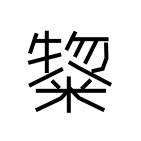

In [12]:
d = document(50, 50, 'mm')
page = d.addpage()
figure = shape().stroke(rgba(0, 0, 0, 255)).width(4)
for write in character:
    line = Polyline(write).scale(30).translate(10, 10)
    page.place(figure.polyline(line))
show(page)

## Fancy brushstroke

Imitating calligraphy with varing stroke width, using the `.fancy_curve()` method of Bezmerizing's `Polyline` class

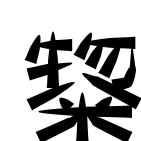

In [13]:
d = document(50, 50, 'mm')
page = d.addpage()
figure = shape().nostroke().fill(rgba(0, 0, 0, 255))
for write in character:
    line = Polyline(write).augment().scale(40).translate(10, 10)
    curve = line.fancy_curve(samples_per=24, thicknesses=[0.2, 3.5, 4.5], tightness=0.8)
    lines = figure.polygon(curve)
    page.place(lines)
show(page)

## Writing random characters

I learned the actual methodology to parse the list using `append`. There are 20976 characters in this file, which matches its documentation. Using `random.choice`, everytime it runs a new character generates.

In [14]:
#making a big honking char list

big_honkin_list = []
for key, characters in chars:
    big_honkin_list.append(characters)

In [15]:
len(big_honkin_list)

20976

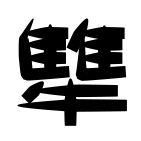

In [16]:
d = document(50, 50, 'mm')
page = d.addpage()
random_char = choice(big_honkin_list)
figure = shape().nostroke().fill(rgba(0, 0, 0, 255))
for write in random_char:
    line = Polyline(write).augment().scale(40).translate(5, 5)
    curve = line.fancy_curve(samples_per=24, thicknesses=[0.2, 4.5, 4], tightness=0.9)
    lines = figure.polygon(curve)
    page.place(lines)
show(page)

Writing lots of characterz with two for loopz! This is vaguely calligraphy looking and I would've been okay with this if I'm just looking to imitate calligraphy of actual Chinese characters (despite most of them being uncommon)

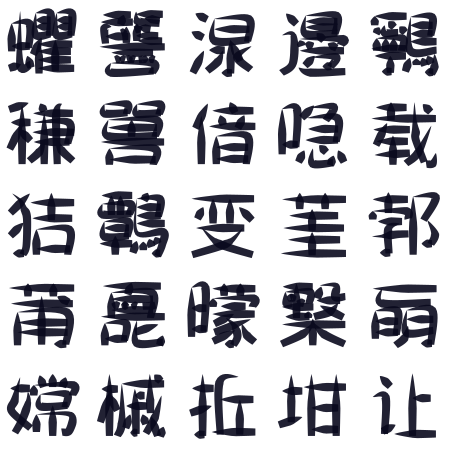

In [119]:
width = 160
height = 160
d = document(width, height, 'mm')
page = d.addpage()
brush = shape().fill(rgba(10, 10, 30, 230)).nostroke()
grid_size = 5

# size of a single rectangle in the grid
cell_size_x = width / grid_size
cell_size_y = height / grid_size
for i in range(grid_size):
    for j in range(grid_size):
        x = i * cell_size_x + (cell_size_x * 0.1) # add 1/2 cell size to offset glyph center
        y = j * cell_size_y + (cell_size_y * 0.1)
        random_char = choice(big_honkin_list)
        for stroke in random_char:
            pline = Polyline(stroke).scale(23).translate(x, y)
            curve = pline.augment().fancy_curve(samples_per=12, thicknesses=[0.01, 3, 2.5])
            page.place(brush.polygon(curve))
show(page)

## Remixing strokes from different characters

In my absolutely ideal dreams, I would mix up different parts of actual characters to make up new ones; yet it turned out impossible with the lack of libraries online and my limiting skills, as well as the difficulty of the writing itself.

Often recognized as pictophonetic, Chinese characters are made up of different parts, specifically recognizable for different radicals embodying different shapes. The same radical can have different shapes, and it can have different sizes, and appear at different parts of a character. Even though I, as a Chinese language practitioner, can easily distinguish different parts of Chinese characters, and potentially attempt to re-mix them, this specific library I'm using doesn't recgonize writing order or radicals / parts, and therefore make it difficult to remix the way I intended to.


![](https://d1w8cc2yygc27j.cloudfront.net/-8900134537382060047/-9022835009915933858.jpg)

image: Common Chinese radicals

### Separating strokes



In [17]:
from itertools import chain

In [18]:
all_strokes = list(chain(*all_data.values()))

In [19]:
list(all_strokes)

[[[0.0, 0.89], [0.89, 0.89], [1.02, 0.97]],
 [[0.06, 0.89],
  [0.255, 0.93],
  [0.405, 0.93],
  [0.555, 0.93],
  [0.705, 0.93],
  [0.9, 0.97]],
 [[0.93, 0.89],
  [0.735, 0.93],
  [0.585, 0.93],
  [0.435, 0.93],
  [0.285, 0.93],
  [0.15, 0.93],
  [-0.03, 0.97]],
 [[0.52, 0.14], [0.52, 0.98]],
 [[0.0, 0.14], [1.0, 0.14]],
 [[0.24, 0.96], [0.54, 0.96]],
 [[0.01, 0.11], [1.0, 0.11]],
 [[0.21, 0.49], [0.87, 0.49]],
 [[0.47, 0.97], [0.74, 0.97]],
 [[0.84, 0.64], [0.72, 1.0]],
 [[0.34, 0.12], [0.2, 0.54]],
 [[0.36, 0.05], [0.36, 0.96]],
 [[0.7, 0.37], [0.96, 0.37]],
 [[0.15, 0.46], [0.42, 0.46]],
 [[0.38, 0.97], [0.91, 0.97]],
 [[0.94, 0.8], [0.87, 1.01]],
 [[0.24, 0.45], [0.03, 0.52]],
 [[0.72, 0.37], [0.54, 0.42], [0.33, 0.48]],
 [[0.47, 0.06], [0.47, 1.0]],
 [[0.0, 0.96], [1.0, 0.96]],
 [[0.48, 0.13], [0.48, 0.99]],
 [[0.0, 0.13], [1.0, 0.13]],
 [[0.0, 0.14], [1.0, 0.14]],
 [[0.54, 0.15], [0.415, 0.56], [0.29, 0.805], [0.09, 0.98]],
 [[0.03, 0.11], [1.0, 0.11]],
 [[0.53, 0.96], [0.8, 0.96]

drawing one random stroke

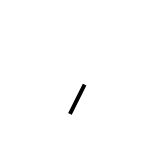

In [20]:
d = document(50, 50, 'mm')
page = d.addpage()
figure = shape().stroke(rgba(0, 0, 0, 255)).width(4)
stroke = random.choice(all_strokes)
line = Polyline(stroke).scale(40).translate(0, 0)
page.place(figure.polyline(line))
show(page)

Getting all the strokes; there are 272634 in total.

In [21]:
len(all_strokes)

272634

In [22]:
## Getting a list of how many "points" are in each stroke

stroke_length = []
for i in range(272634):
    stroke_length.append(len(all_strokes[i]))

In [23]:
## Setting up random seed to get random stroke

seed_1 = random.randint(0,272634)
print(seed_1)

stroke_length[seed_1]

19791


3

Unlike the hand-written library in `Char74k`, each stroke in this library is usually short and straight, consisting of usually 2, no more than three points. To make the writing more dynamic, I tried to write longer, continous strokes by connecting the points together.

In [24]:
random.seed(a=None, version=2)

i = random.randint(0,272634)

random.seed(i)
random_index = random.randint(0,272634)

print(all_strokes[i])
random_len = len(all_strokes[i])

print(random_len)

random.seed(i)
stroke = random.sample(all_strokes, random_len + 1)

stroke_item = list(chain.from_iterable(stroke))

print(stroke_item)

[[0.3, 0.13], [0.63, 0.13]]
2
[[0.98, 0.81], [0.98, 0.95], [0.42, 0.76], [0.9, 0.76], [0.53, 0.12], [0.53, 0.645], [0.96, 0.63], [0.95, 0.83], [0.88, 1.01]]


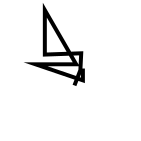

In [25]:
d = document(50, 50, 'mm')
page = d.addpage()
figure = shape().stroke(rgba(0, 0, 0, 255)).width(4)
line = Polyline(stroke_item).scale(30).translate(0, 0)
page.place(figure.polyline(line))
show(page)

Hoping be as close to "seperating different parts" as possible, here I'm finding stroke indexes, in order to write multiple strokes that are "next to" each other in the big list. They look interesting, but kind of like some sort of modernist design.

`all_strokes.index(stroke)`

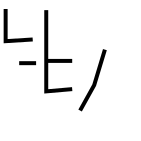

In [26]:
d = document(50, 50, 'mm')
page = d.addpage()
figure1 = shape().stroke(rgba(0, 0, 0, 255)).width(4)
stroke1 = random.choice(all_strokes)
line1 = Polyline(stroke1).scale(40).translate(0, 0)

stroke_index = all_strokes.index(stroke1)

figure2 = shape().stroke(rgba(0, 0, 0, 255)).width(4)
stroke2 = all_strokes[(stroke_index) + 1]
line2 = Polyline(stroke2).scale(40).translate(0, 0)

figure3 = shape().stroke(rgba(0, 0, 0, 255)).width(4)
stroke3 = all_strokes[(stroke_index) + 2]
line3 = Polyline(stroke3).scale(40).translate(0, 0)

figure4 = shape().stroke(rgba(0, 0, 0, 255)).width(4)
stroke4 = all_strokes[(stroke_index) + 3]
line4 = Polyline(stroke4).scale(40).translate(0, 0)

figure5 = shape().stroke(rgba(0, 0, 0, 255)).width(4)
stroke5 = all_strokes[(stroke_index) + 4]
line5 = Polyline(stroke5).scale(40).translate(0, 0)

page.place(figure1.polyline(line1))
page.place(figure2.polyline(line2))
page.place(figure3.polyline(line3))
page.place(figure3.polyline(line4))
page.place(figure3.polyline(line5))

show(page)

In [83]:
def make_char():
    char = [Polyline(s) for s in random.sample(all_strokes, choice([72, 73, 74]))]
    return char

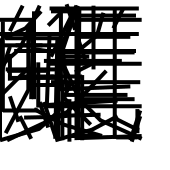

In [140]:
d = document(60, 60, 'mm')
page = d.addpage()
figure = shape().stroke(rgba(0, 0, 0, 255)).width(4)
random_strokes = make_char()
for pline in random_strokes:
    pline = pline.scale(50)
    lines = figure.polyline(pline)
    
    page.place(lines)
show(page)

In [75]:
# page.svg()
# with open("04.svg", "wb") as fh:
#     fh.write(page.svg())

Not to make the lines curvy to see if it improves how they look

226790
[[0.48, 0.7], [0.67, 0.7], [0.72, 0.96], [0.92, 0.96], [0.74, 0.52], [0.86, 0.76]]
Polyline([[19.2000, 28.0000], [26.8000, 28.0000], [28.8000, 38.4000], [36.8000, 38.4000], [29.6000, 20.8000], [34.4000, 30.4000]])


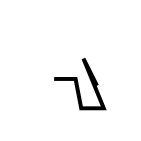

In [29]:
d = document(50, 50, 'mm')
page = d.addpage()
figure = shape().stroke(rgba(0, 0, 0, 255)).width(4)
stroke = random.choice(all_strokes)

stroke_index = all_strokes.index(stroke)
print(stroke_index)
stroke += all_strokes[(stroke_index) + 1]
stroke += all_strokes[(stroke_index) + 2]

line = Polyline(stroke).scale(40).translate(0, 0)

print(stroke)
print(line)

page.place(figure.polyline(line))
show(page)

In [30]:
curve_path = line.smooth_path()
curve_path

Path([moveto(x=26.8000, y=28.0000), curveto(x1=28.4000, y1=29.7333, x2=27.1333, y2=36.6667, x=28.8000, y=38.4000), moveto(x=28.8000, y=38.4000), curveto(x1=30.4667, y1=40.1333, x2=36.6667, y2=41.3333, x=36.8000, y=38.4000), moveto(x=36.8000, y=38.4000), curveto(x1=36.9333, y1=35.4667, x2=30.0000, y2=22.1333, x=29.6000, y=20.8000)])

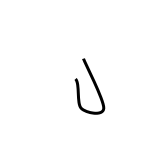

In [31]:
d = document(50, 50, 'mm')
page = d.addpage()
curve_figure = shape().stroke(rgba(0, 0, 0, 255)).width(3)
curve = curve_figure.path(curve_path)
page.place(curve)
show(page)

## Constructing new characters with more than one stroke

Using `random.seed` to generate a seed, so that the random strokes stay the same??

In [32]:
random.seed(a=None, version=2)

i = random.randint(0,272634)

random.seed(i)
random_index = random.randint(0,272634)

random_len = len(all_strokes[i])

stroke = random.sample(all_strokes, random_len)
stroke += random.sample(all_strokes, random_len)

print(stroke)

[[[0.23, 0.04], [0.23, 0.37]], [[0.68, 0.57], [0.68, 0.96]], [[0.57, 0.06], [0.4, 0.52], [0.96, 0.5]], [[0.32, 0.06], [0.03, 0.35]]]


Adding some length onto the strokes and prepare the strokes list for remixing

In [91]:
i = random.randint(0,272634)

random.seed(i)
random_index = random.randint(0,272634)

random_len = len(all_strokes[i])

print(random_len)

## to be nested??

stroke = random.choice(all_strokes)

stroke_index = all_strokes.index(stroke)
stroke += all_strokes[(stroke_index) + 1]
stroke += all_strokes[(stroke_index) + 2]

# print(stroke)

stroke_1 = all_strokes[(stroke_index) + 3]
stroke_1 += all_strokes[(stroke_index) + 4]
stroke_1 += all_strokes[(stroke_index) + 5]

# print(stroke_1)

stroke_2 = all_strokes[(stroke_index) + 6]
stroke_2 += all_strokes[(stroke_index) + 7]

strokes = [stroke, stroke_1, stroke_2]

print(strokes)

2
[[[0.46, 0.61], [0.95, 0.61], [0.46, 0.76], [0.95, 0.76], [0.77, 0.97], [0.94, 0.97]], [[0.33, 0.53], [0.0, 0.64], [0.18, 0.04], [0.195, 0.97], [0.06, 1.0], [0.41, 0.09], [0.285, 0.44], [0.575, 0.42], [0.56, 0.91]], [[0.02, 0.33], [0.28, 0.33], [0.69, 0.33], [0.98, 0.33]]]


### Putting them together: Three Iterations

01: Curvy

02: Varying thickness

03: Both, in repetition

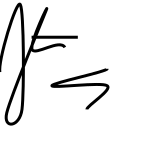

In [92]:
def make_char():
    char = [Polyline(s) for s in strokes]
    return char

d = document(50, 50, 'mm')
page = d.addpage()
figure = shape().stroke(rgba(0, 0, 0, 255)).width(4)
random_strokes = make_char()

list(random_strokes)

for pline in random_strokes:
    pline = pline.scale(40)
    lines = figure.polyline(pline)
    
    curve_path = pline.smooth_path()
    curve_figure = shape().stroke(rgba(0, 0, 0, 255)).width(3)
    curve = curve_figure.path(curve_path)
    page.place(curve)
    
show(page)

[[[0.46, 0.61], [0.95, 0.61], [0.46, 0.76], [0.95, 0.76], [0.77, 0.97], [0.94, 0.97]], [[0.33, 0.53], [0.0, 0.64], [0.18, 0.04], [0.195, 0.97], [0.06, 1.0], [0.41, 0.09], [0.285, 0.44], [0.575, 0.42], [0.56, 0.91]], [[0.02, 0.33], [0.28, 0.33], [0.69, 0.33], [0.98, 0.33]]]


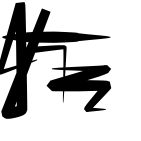

In [159]:
def make_char():
    char = [(s) for s in strokes]
    return char

d = document(50, 50, 'mm')
page = d.addpage()
figure = shape().nostroke().fill(rgba(0, 0, 0, 255))
random_strokes = make_char()

print(random_strokes)

for pline in random_strokes:
    line = Polyline(pline).augment().scale(40).translate(0, 0)
    curve = line.fancy_curve(samples_per=24, thicknesses=[0.2, 3.5, 4, 2.5, 0.1], tightness=0.9)
    lines = figure.polygon(curve)
    page.place(lines)
    
show(page)

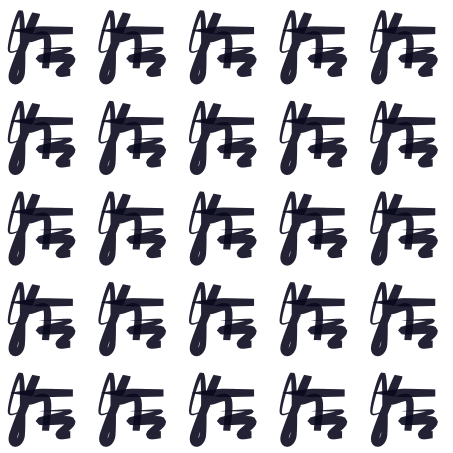

In [180]:
def make_char():
    char = [(s) for s in strokes]
    return char

width = 160
height = 160
d = document(width, height, 'mm')
page = d.addpage()

brush = shape().fill(rgba(10, 10, 30, 230)).nostroke()
grid_size = 5

# size of a single rectangle in the grid
cell_size_x = width / grid_size
cell_size_y = height / grid_size
for i in range(grid_size):
    for j in range(grid_size):
        random_strokes = make_char()
        x = i * cell_size_x + (cell_size_x * 0.1) # add 1/2 cell size to offset glyph center
        y = j * cell_size_y + (cell_size_y * 0.1)
        random_char = random_strokes
        for stroke in random_char:
            pline = Polyline(stroke).scale(23).translate(x, y)
            curve = pline.augment().fancy_curve(samples_per=12, thicknesses=[0.01, 3, 2.5])
            page.place(brush.polygon(curve))
show(page)

In [181]:
# page.svg()
# with open("05.svg", "wb") as fh:
#     fh.write(page.svg())

getting new random values so that they don't all look the same!!

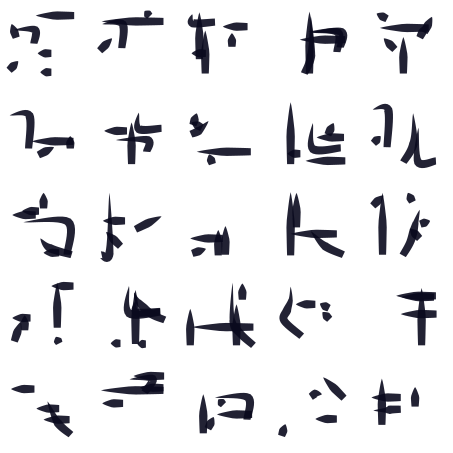

In [192]:
def make_char():
    char = [(s) for s in random.sample(all_strokes, choice([4,5,6]))]
    return char

width = 160
height = 160
d = document(width, height, 'mm')
page = d.addpage()

brush = shape().fill(rgba(10, 10, 30, 230)).nostroke()
grid_size = 5

# size of a single rectangle in the grid
cell_size_x = width / grid_size
cell_size_y = height / grid_size
for i in range(grid_size):
    for j in range(grid_size):
        random_strokes = make_char()
        x = i * cell_size_x + (cell_size_x * 0.1) # add 1/2 cell size to offset glyph center
        y = j * cell_size_y + (cell_size_y * 0.1)
        random_char = random_strokes
        for stroke in random_char:
            pline = Polyline(stroke).scale(23).translate(x, y)
            curve = pline.augment().fancy_curve(samples_per=12, thicknesses=[0.01, 3, 2.5])
            page.place(brush.polygon(curve))
show(page)

OK now adding more lines to this to make it look less awful...

In [224]:
stroke = random.choice(all_strokes)

stroke_index = all_strokes.index(stroke)
stroke += all_strokes[(stroke_index) + 1]
stroke += all_strokes[(stroke_index) + 2]

stroke_1 = all_strokes[(stroke_index) + 3]
stroke_1 += all_strokes[(stroke_index) + 4]
stroke_1 += all_strokes[(stroke_index) + 5]

stroke_2 = all_strokes[(stroke_index) + 6]
stroke_2 += all_strokes[(stroke_index) + 7]

strokes = [stroke, stroke_1, stroke_2]

def make_char():
    char = [(s) for s in random.sample(strokes, choice([1]))]
    return char

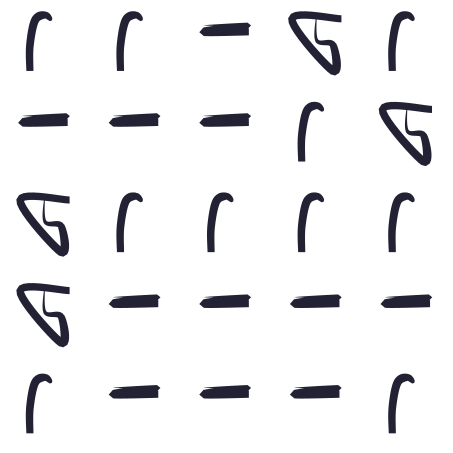

In [225]:
width = 160
height = 160
d = document(width, height, 'mm')
page = d.addpage()

brush = shape().fill(rgba(10, 10, 30, 230)).nostroke()
grid_size = 5

# size of a single rectangle in the grid
cell_size_x = width / grid_size
cell_size_y = height / grid_size
for i in range(grid_size):
    for j in range(grid_size):
        random_strokes = make_char()
        x = i * cell_size_x + (cell_size_x * 0.1) # add 1/2 cell size to offset glyph center
        y = j * cell_size_y + (cell_size_y * 0.1)
        random_char = random_strokes
        for stroke in random_char:
            pline = Polyline(stroke).scale(23).translate(x, y)
            curve = pline.augment().fancy_curve(samples_per=12, thicknesses=[0.01, 3, 2.5])
            page.place(brush.polygon(curve))
show(page)

In [200]:
# page.svg()
# with open("06.svg", "wb") as fh:
#     fh.write(page.svg())

?? why ?? excuse me??

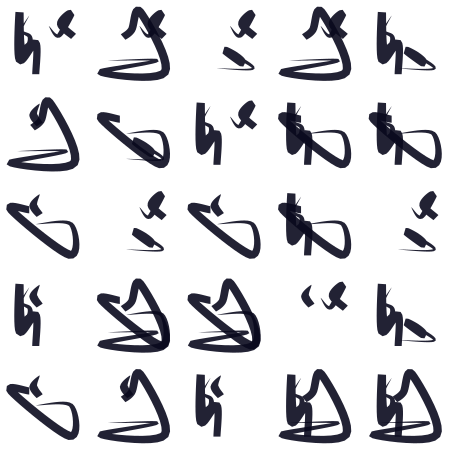

In [233]:
stroke = random.choice(all_strokes)

stroke_index = all_strokes.index(stroke)
stroke += all_strokes[(stroke_index) + 1]
stroke += all_strokes[(stroke_index) + 2]

stroke_1 = all_strokes[(stroke_index) + 3]
stroke_1 += all_strokes[(stroke_index) + 4]
stroke_1 += all_strokes[(stroke_index) + 5]

stroke_2 = all_strokes[(stroke_index) + 6]
stroke_2 += all_strokes[(stroke_index) + 7]

stroke_3 = all_strokes[(stroke_index) + 8]
stroke_3 += all_strokes[(stroke_index) + 9]

stroke_4 = all_strokes[(stroke_index) + 8]
stroke_4 += all_strokes[(stroke_index) + 9]
stroke_4 = all_strokes[(stroke_index) + 10]

stroke_5 = all_strokes[(stroke_index) + 11]
stroke_5 += all_strokes[(stroke_index) + 12]

strokes = [stroke, stroke_1, stroke_2, stroke_3, stroke_4, stroke_5]

def make_char():
    char = [(s) for s in random.sample(strokes, choice([2]))]
    return char

width = 160
height = 160
d = document(width, height, 'mm')
page = d.addpage()

brush = shape().fill(rgba(10, 10, 30, 230)).nostroke()
grid_size = 5

# size of a single rectangle in the grid
cell_size_x = width / grid_size
cell_size_y = height / grid_size
for i in range(grid_size):
    for j in range(grid_size):
        random_strokes = make_char()        
        x = i * cell_size_x + (cell_size_x * 0.1) # add 1/2 cell size to offset glyph center
        y = j * cell_size_y + (cell_size_y * 0.1)
        random_char = random_strokes
        for stroke in random_char:
            pline = Polyline(stroke).scale(23).translate(x, y)
            curve = pline.augment().fancy_curve(samples_per=12, thicknesses=[0.01, 3, 2.5])
            page.place(brush.polygon(curve))
show(page)

### More to come next week!